# The Spark Foundation : GRIP

## Author : Mohamed Gamal

## Task5

###  Exploratory Data Analysis on dataset Indian Premier League

**As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

**Suggest teams or players a company should endorse for its products.**

Content

All Indian Premier League Cricket matches between 2008 and 2016.

This is the ball by ball data of all the IPL cricket matches till season 9.

The dataset contains 2 files: deliveries.csv and matches.csv.

matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.

deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

In [1]:
#import libraries
import numpy as np                                                      #for fast operations on arrays    
import pandas as pd                                                     #for read & manipulate dataset
import matplotlib.pyplot as plt                                         #for Data visualization
import seaborn as sns                                                   #for Data visualization
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load dataset
dataset_deliveries = pd.read_csv('deliveries.csv')
dataset_matches = pd.read_csv('matches.csv')
df_deliveries = dataset_deliveries.copy()
df_matches= dataset_matches.copy()

## EDA Matches

In [3]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
print("Nimber of rows : {}".format(df_matches.shape[0]))

Nimber of rows : 756


In [9]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(df_matches)

,Total,Percent
umpire3,637,0.842593
city,7,0.009259
player_of_match,4,0.005291
winner,4,0.005291
umpire1,2,0.002646
umpire2,2,0.002646
toss_winner,0,0.000000
season,0,0.000000
date,0,0.000000
team1,0,0.000000


Text(0.5, 1.0, 'Number of matches per season')

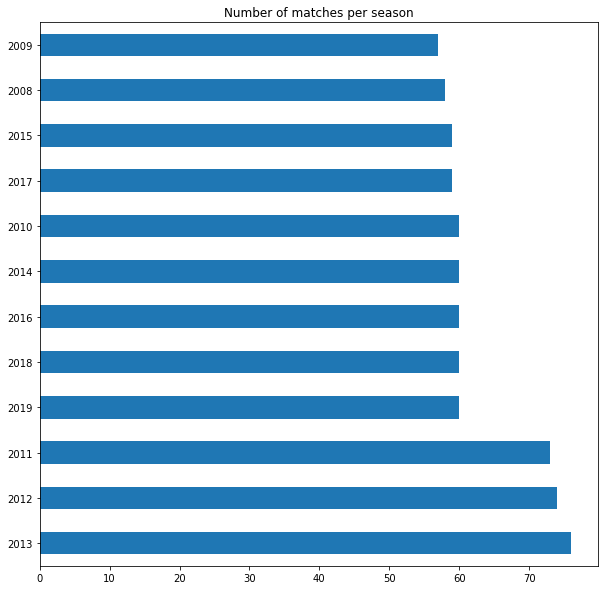

In [11]:
df_matches['season'].value_counts().plot(kind='barh',figsize=[10,10])
plt.title('Number of matches per season')

**2011, 2012, 2013 seasons have more matchs than other**

Text(0.5, 1.0, 'Number of matches per city')

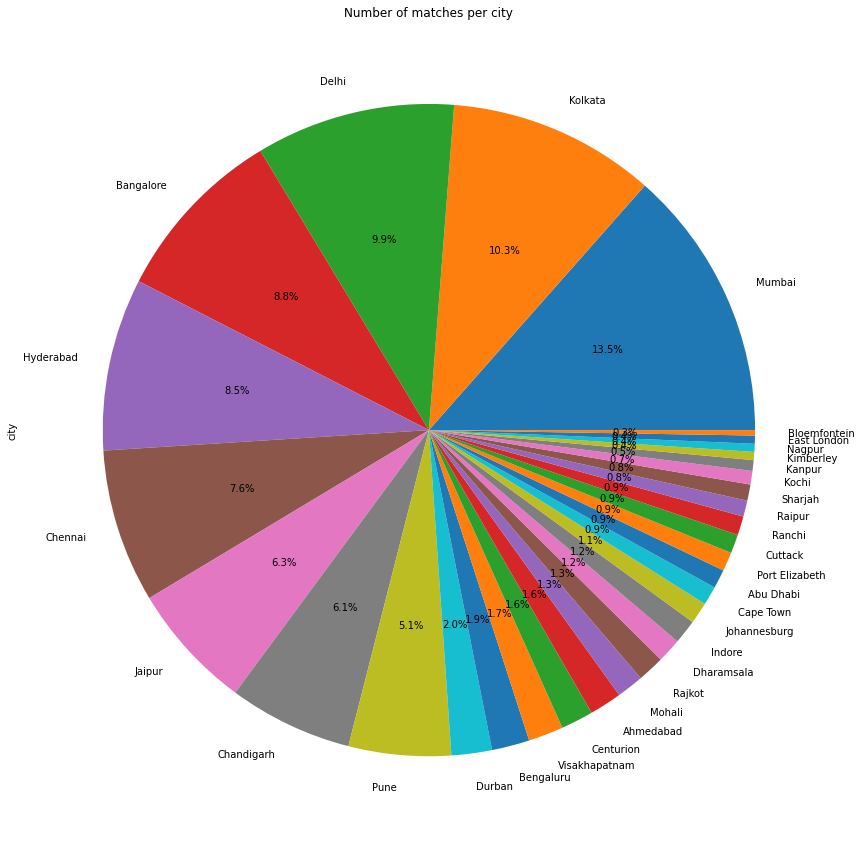

In [12]:
df_matches['city'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.title('Number of matches per city')

**Mumbai** is the city with the most matches

Text(0.5, 1.0, 'the most team win toss')

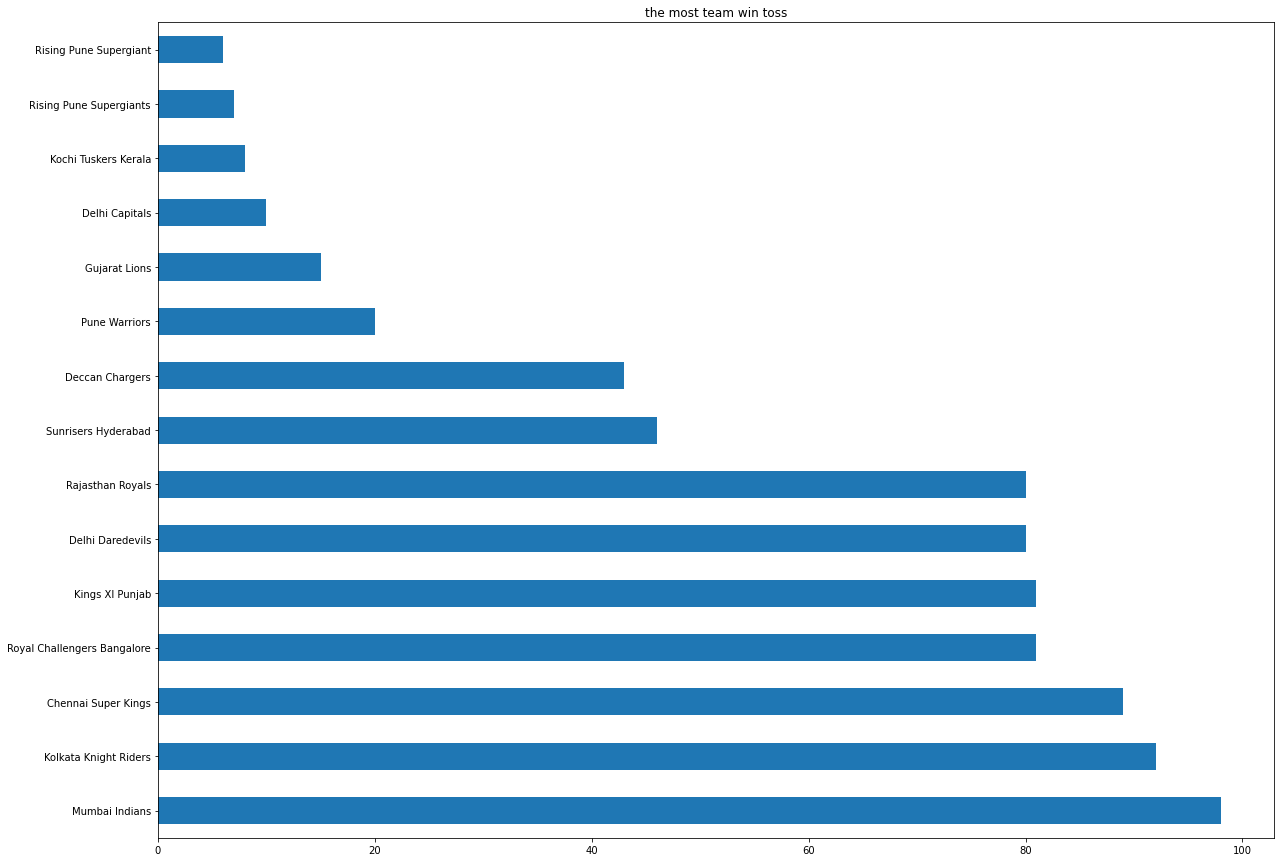

In [13]:
df_matches.toss_winner.value_counts().plot(kind='barh',figsize=[20,15])
plt.title('the most team win toss')

Text(0.5, 1.0, 'favorite toss')

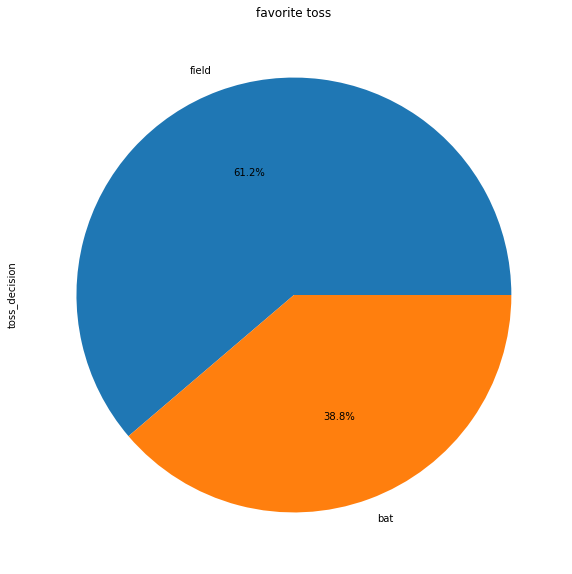

In [14]:
df_matches.toss_decision.value_counts().plot(kind='pie',figsize=[10,10],autopct='%1.1f%%')
plt.title('favorite toss')

Text(0.5, 1.0, 'Toss Results')

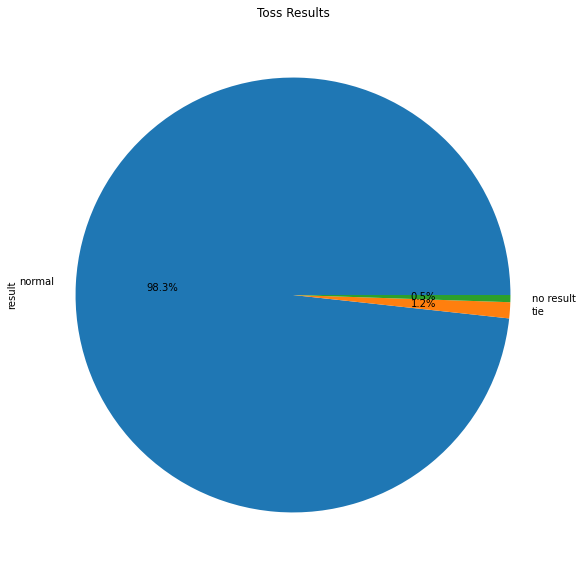

In [15]:
df_matches.result.value_counts().plot(kind='pie',figsize=[10,10],autopct='%1.1f%%')
plt.title('Toss Results')

Text(0.5, 1.0, 'the most team win')

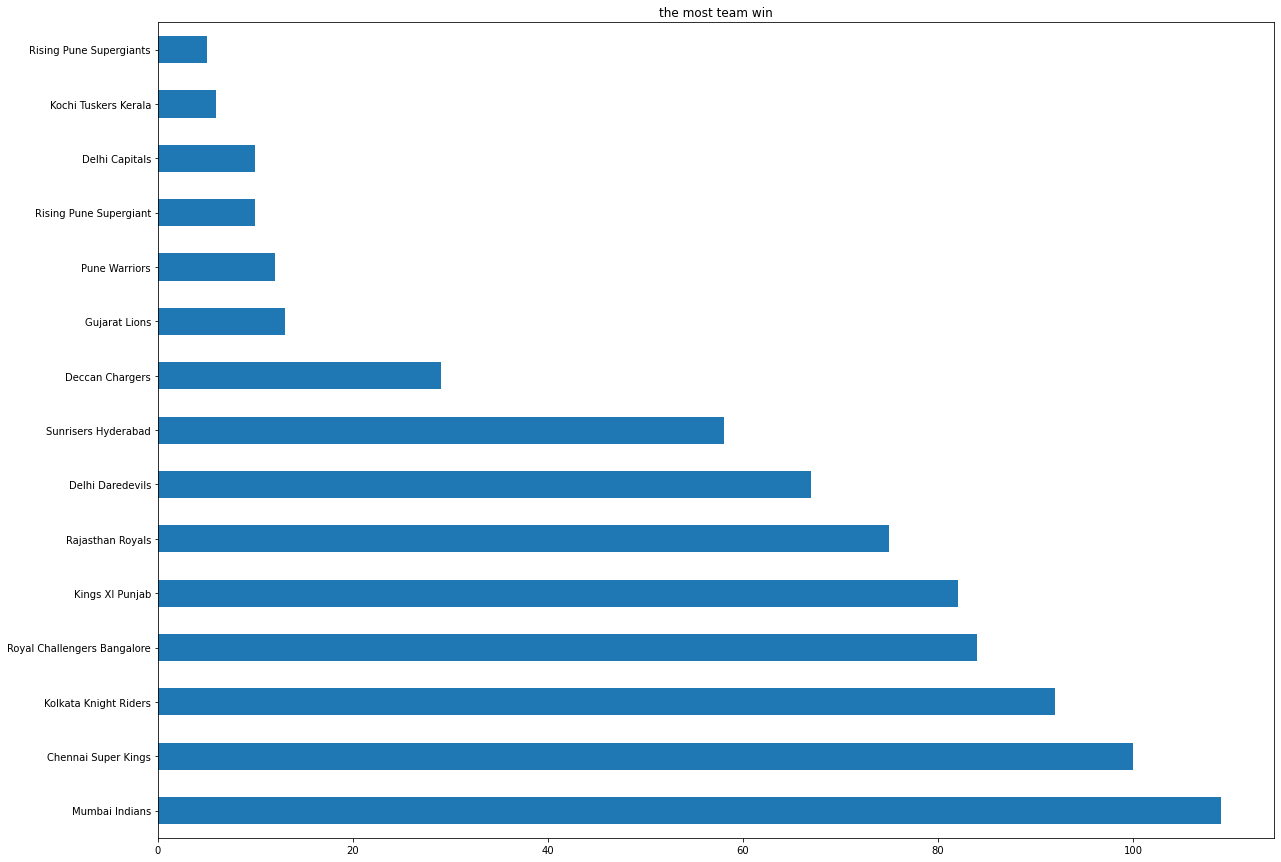

In [16]:
df_matches.winner.value_counts().plot(kind='barh',figsize=[20,15])
plt.title('the most team win')

Text(0.5, 1.0, 'popular staduim')

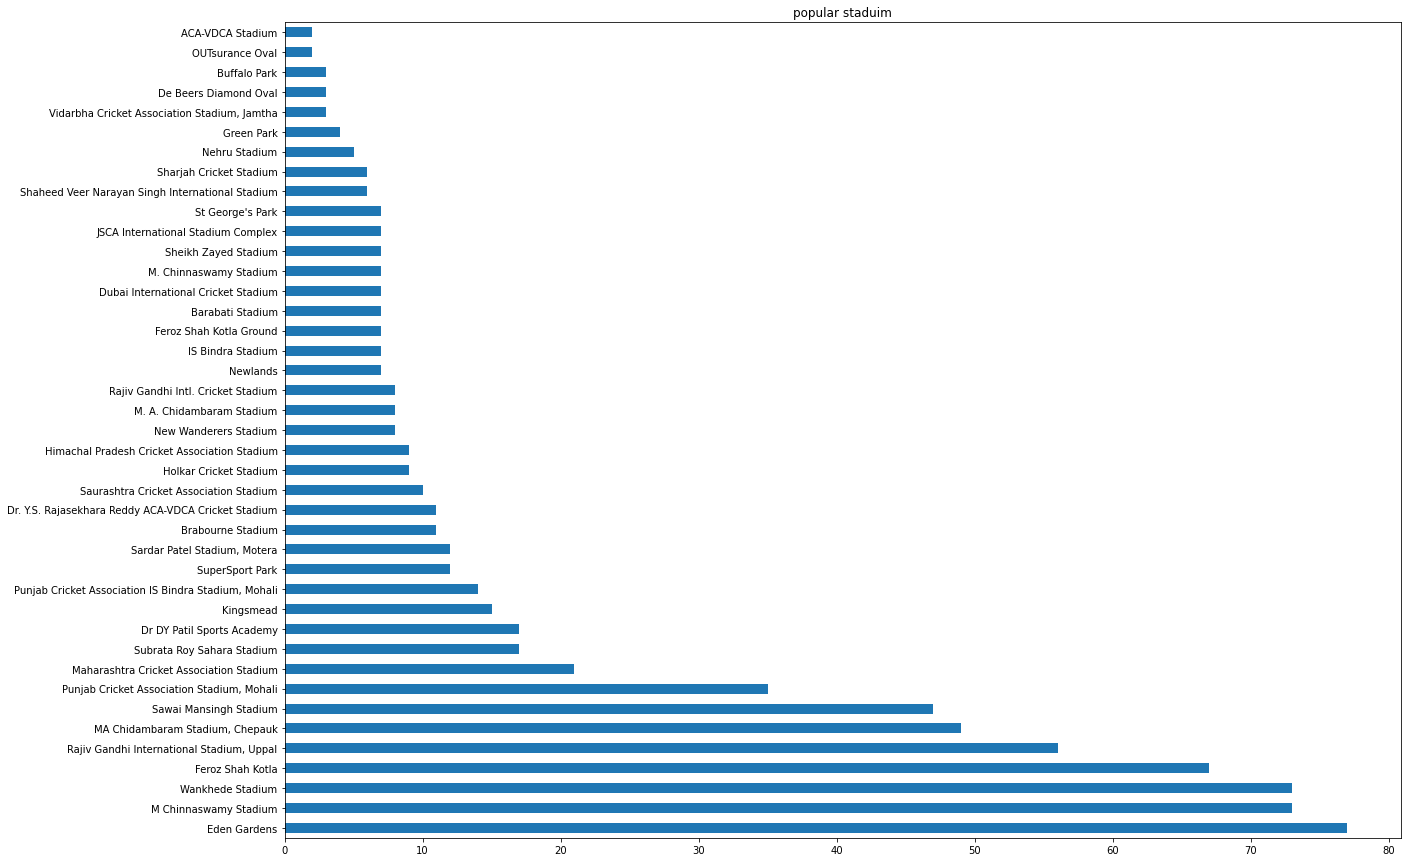

In [17]:
df_matches.venue.value_counts().plot(kind='barh',figsize=[20,15])
plt.title('popular staduim')

Text(0.5, 1.0, 'Top 10 best player')

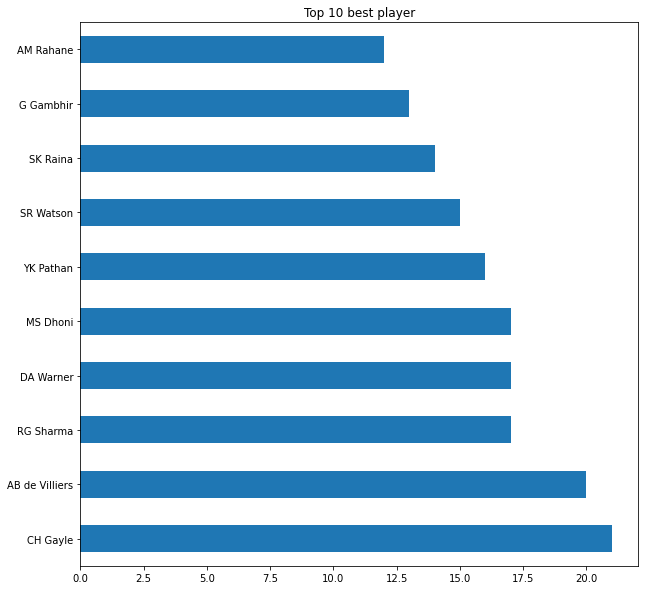

In [18]:
df_matches.player_of_match.value_counts()[0:10].plot(kind='barh',figsize=[10,10])
plt.title('Top 10 best player')

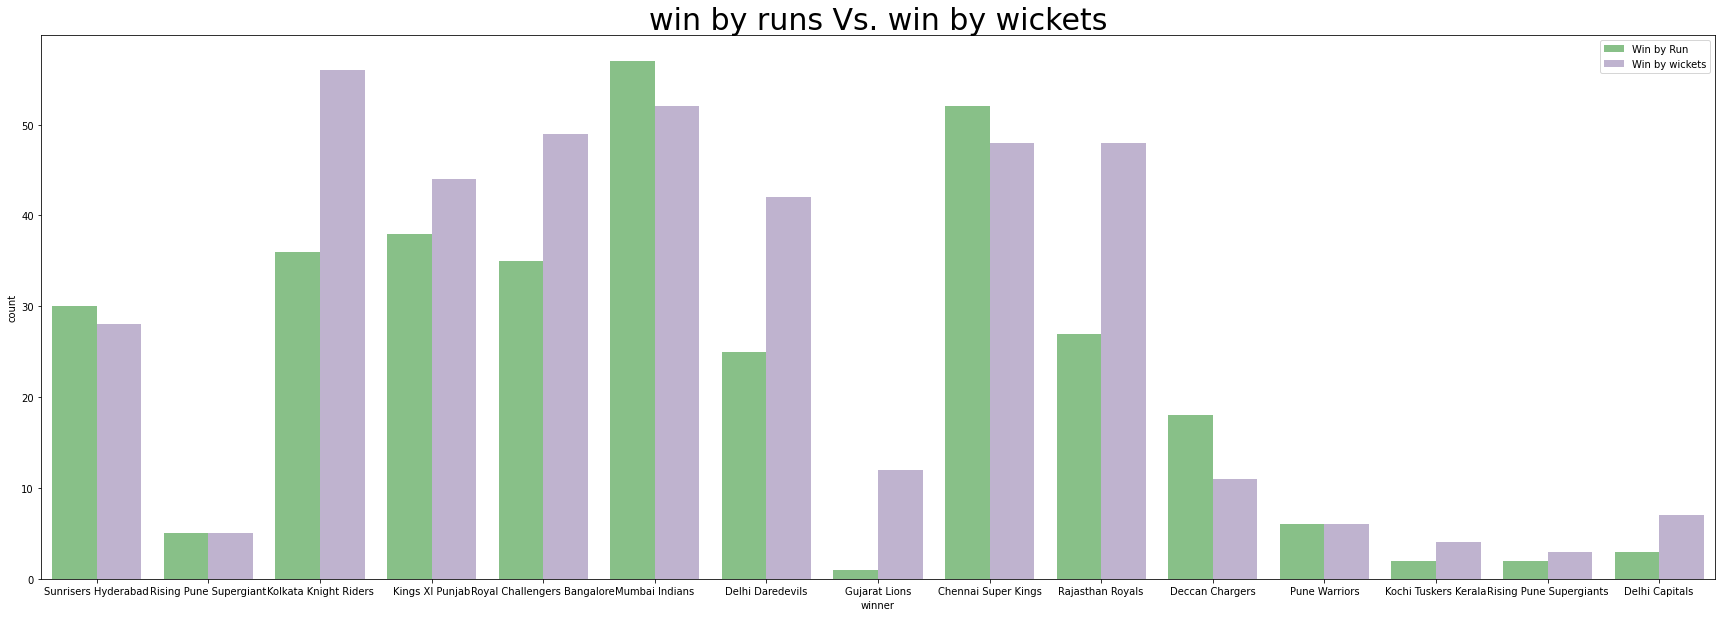

In [19]:
plt.subplots(figsize = (30,10))
df_matches['run'] = df_matches['win_by_runs'].apply(lambda x: '0' if x <= 0 else '1')
ax = sns.countplot(x="winner", hue ='run', data = df_matches,palette = "Accent")
legend_labels, _= ax.get_legend_handles_labels()
plt.title('win by runs Vs. win by wickets', fontsize = 30)
ax.legend(legend_labels, ['Win by Run','Win by wickets'], bbox_to_anchor=(1,1))
plt.show()

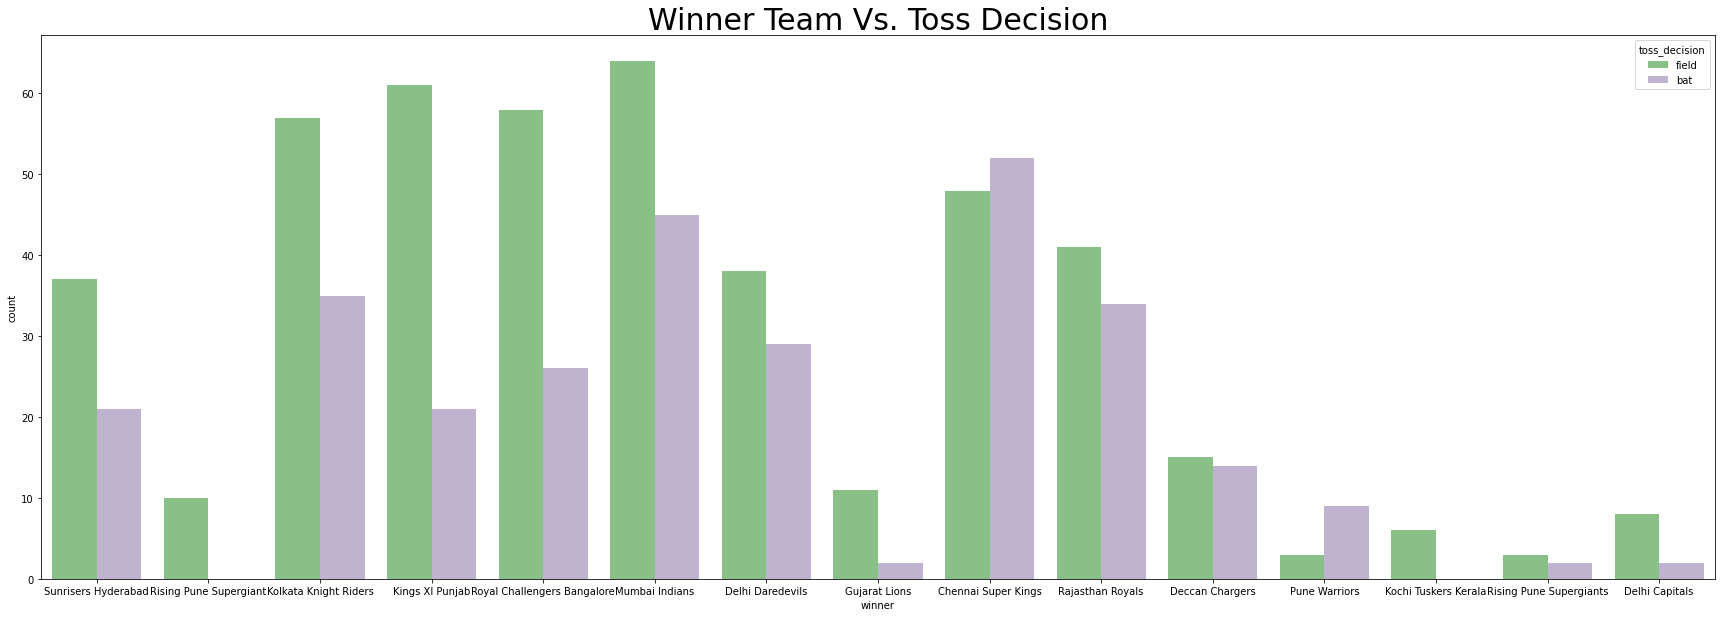

In [20]:
plt.subplots(figsize = (30,10))
sns.countplot(x="winner", hue ='toss_decision', data = df_matches,palette = "Accent")
legend_labels, _= ax.get_legend_handles_labels()
plt.title('Winner Team Vs. Toss Decision', fontsize = 30)
plt.show()

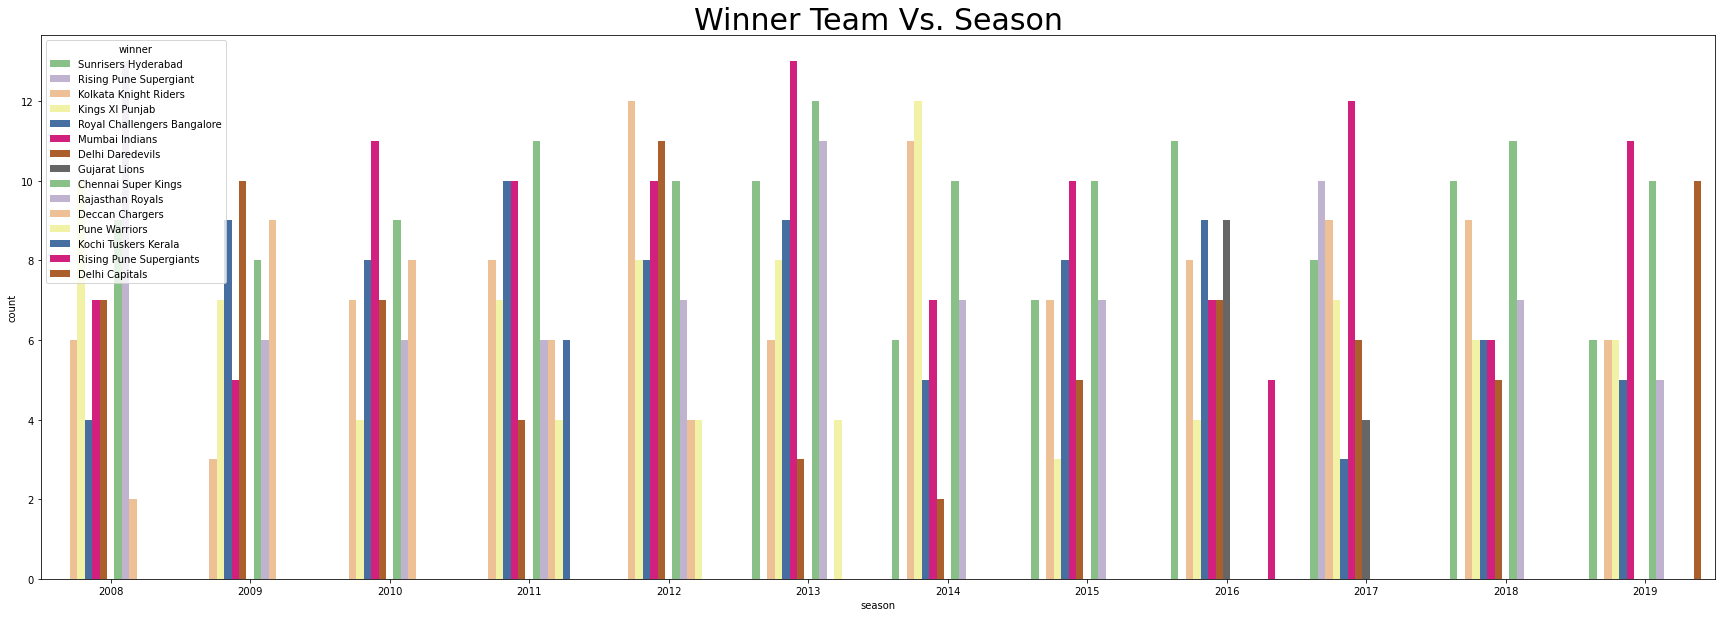

In [21]:
plt.subplots(figsize = (30,10))
sns.countplot(x="season", hue ='winner', data = df_matches,palette = "Accent")
legend_labels, _= ax.get_legend_handles_labels()
plt.title('Winner Team  Vs. Season', fontsize = 30)
plt.show()

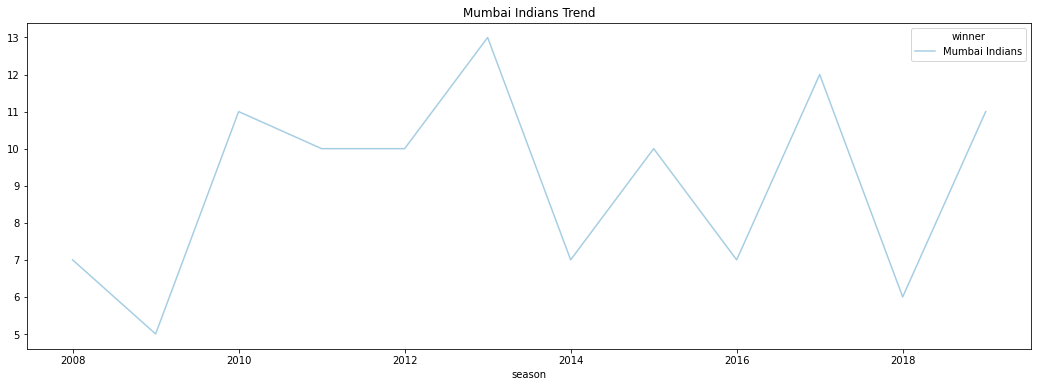

In [22]:
snap_1 = df_matches[df_matches['winner']=='Mumbai Indians']
pd.crosstab(snap_1.season,snap_1.winner).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Mumbai Indians Trend")
plt.show()

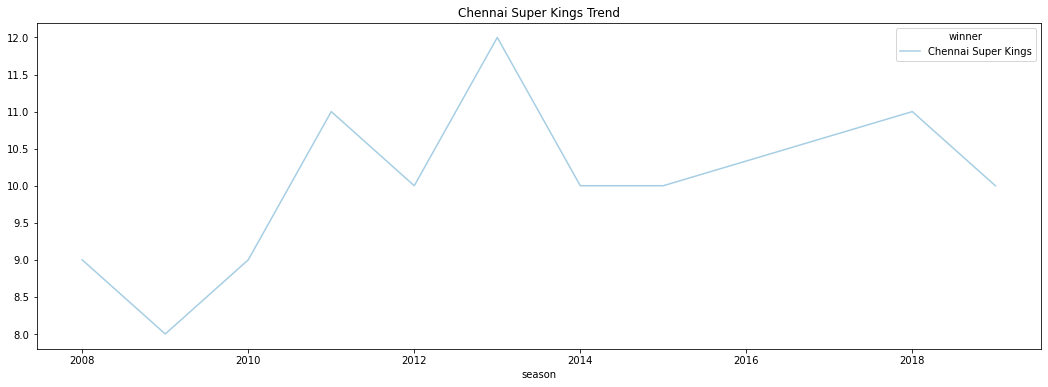

In [23]:
snap_2 = df_matches[df_matches['winner']=='Chennai Super Kings']
pd.crosstab(snap_2.season,snap_2.winner).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Chennai Super Kings Trend")
plt.show()

## EDA Deliveries

In [24]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


 - inning : Tells if the first set of batting was going on or second. 1: First Innings 2: Second Innings
 
 - batting_team : The team name which is currently batting.
 
 - bowling_team : The team name which is currently bowling.
 
 - over : Describe the current over number.
 
 - ball : Describe the current bowl no of the current over.
 
 - batsman : Name of the batsman on striking end.
 
 - non_striker : Name of the batsman on non-striking end.
 


In [29]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [30]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [31]:
print("Nimber of rows : {}".format(df_deliveries.shape[0]))

Nimber of rows : 179078


In [34]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(df_deliveries)

,Total,Percent
fielder,172630,0.963993
player_dismissed,170244,0.950670
dismissal_kind,170244,0.950670
bowler,0,0.000000
inning,0,0.000000
batting_team,0,0.000000
bowling_team,0,0.000000
over,0,0.000000
ball,0,0.000000
batsman,0,0.000000


In [35]:
#check duplicate rows
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dub = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dub

check_duplicate(df_deliveries)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,179055,23,99.987156,0.012844


In [36]:
#Drop duplicates
df_deliveries.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Most batting team')

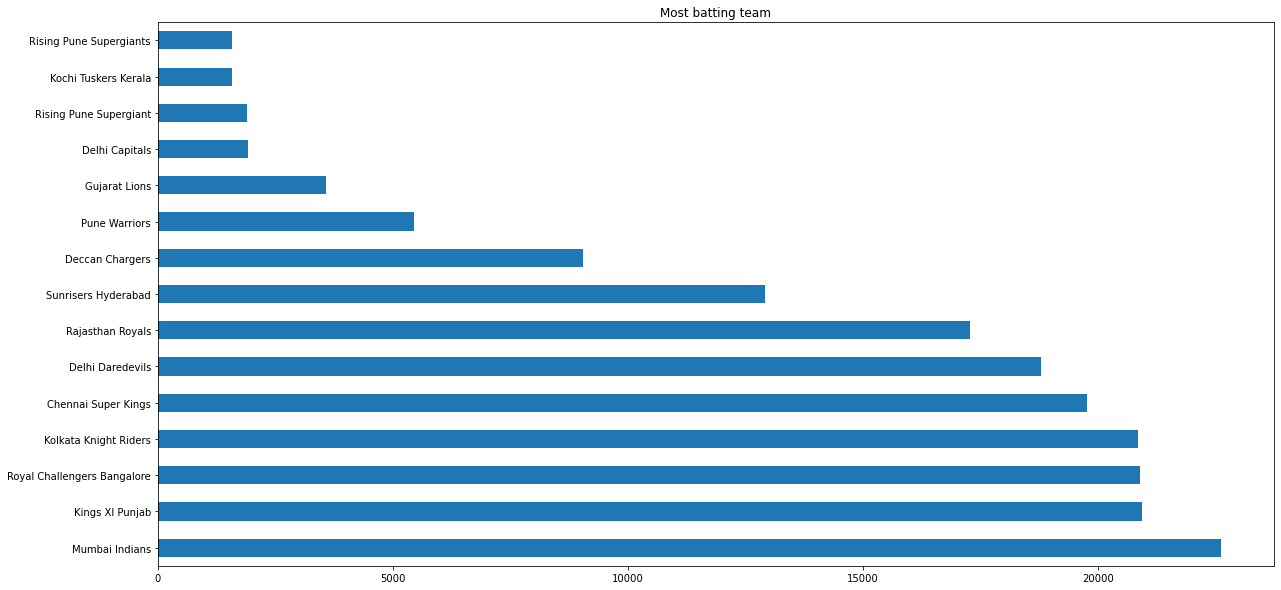

In [40]:
df_deliveries.batting_team.value_counts().plot(kind='barh',figsize=[20,10])
plt.title('Most batting team')

Text(0.5, 1.0, 'Most bowling team')

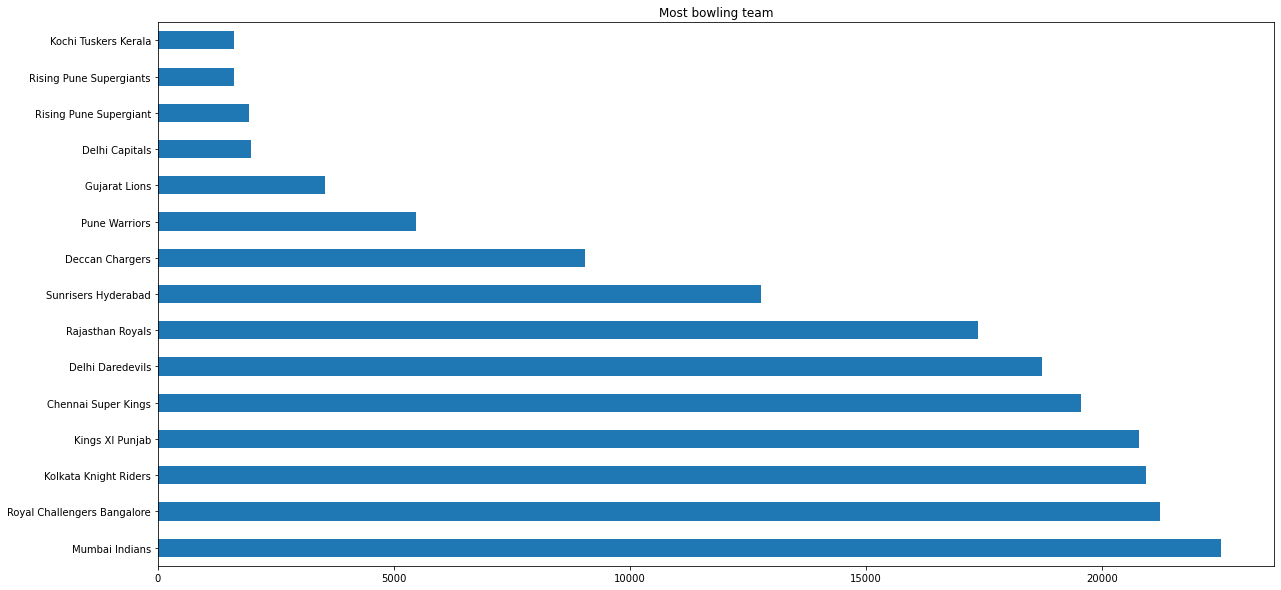

In [41]:
df_deliveries.bowling_team.value_counts().plot(kind='barh',figsize=[20,10])
plt.title('Most bowling team')

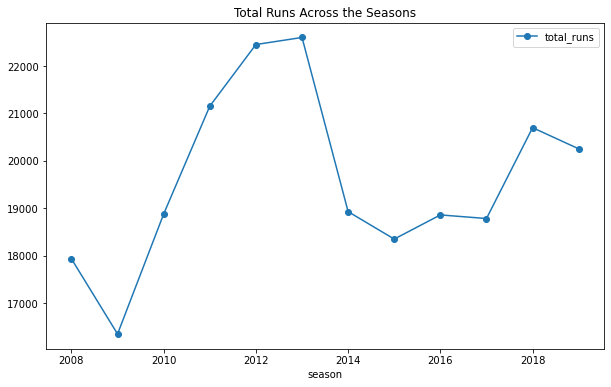

In [42]:
batsmen = df_matches[['id','season']].merge(df_deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

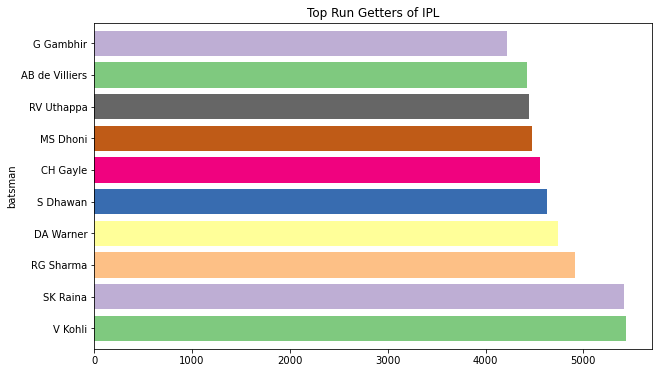

In [48]:
plt.subplots(figsize=(10,6))
max_runs=df_deliveries.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.barh(width=0.8,color=sns.color_palette('Accent',20))
plt.title("Top Run Getters of IPL")
plt.show()

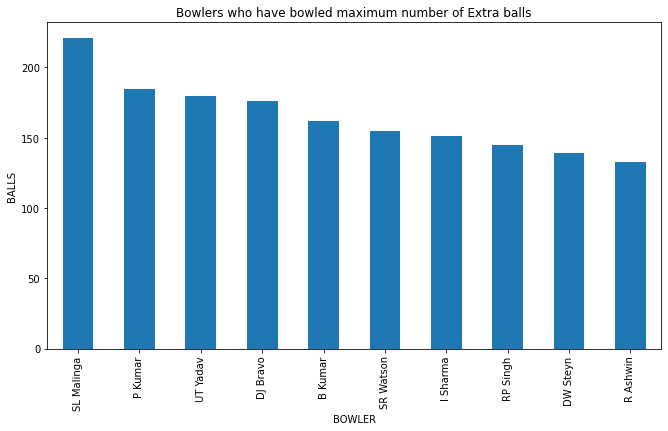

In [49]:
extra = df_deliveries[df_deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

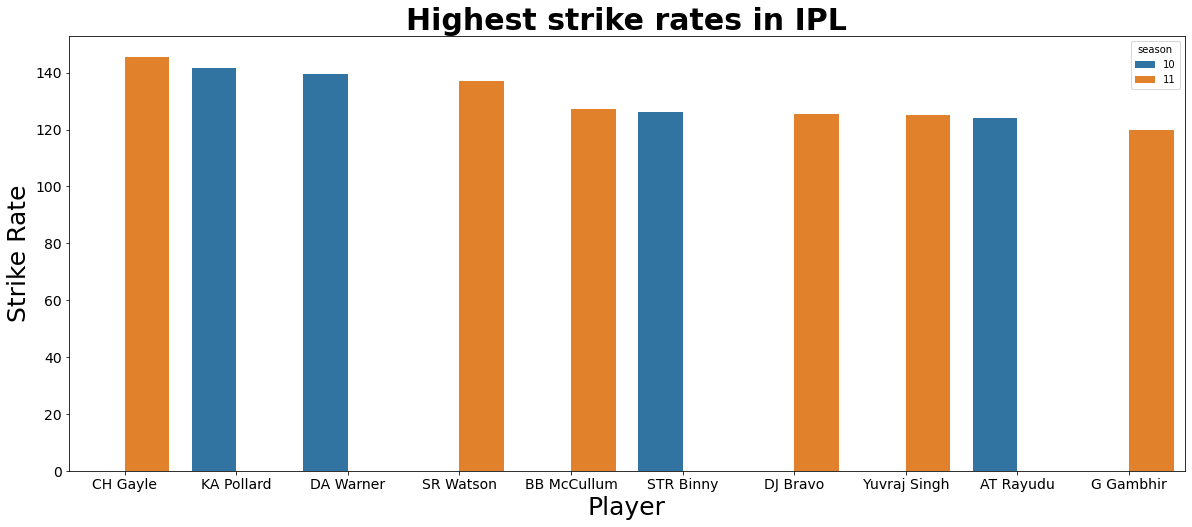

In [56]:
#We will consider players who have played 10 or more seasons
#merging the 2 datasets
merge = pd.merge(df_deliveries,df_matches, left_on='match_id', right_on ='id')

#total number of matches played by each batsman
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) 

#total runs of each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())

#season = 1 implies played only 1 season
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) 

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',ascending = False)

plt.figure(figsize = (20,8))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)